In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix
import numpy as np

In [20]:
#import first 150k reviews, and second 130k reviews
review1 = pd.read_csv(os.path.join('winemag-data_first150k.csv'))
review2 = pd.read_csv(os.path.join('winemag-data-130k-v2.csv'))

#concatenate both dataframes by common columns
review_df = pd.concat([review1, review2], sort=False)

#drop unnamed index columns
review_df = review_df.drop(['Unnamed: 0'], axis=1)
model_df = review_df[['country', 'designation', 'points', 'province', 'variety', 'price']]

#drop NaN values
model_df = model_df.dropna()

#list top x countries and place in list to train data set
x = 6
column = 'country'
category = pd.DataFrame(model_df[column].value_counts().head(x))
category = category.index.tolist()

#reduce dataframe to contain only countries in list
model_df = model_df.loc[model_df[column].isin(category)]

In [22]:
#define X and y parameters
X = model_df[['points', column]]
y = model_df["price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(152687, 2) (152687, 1)


In [23]:
data = X.copy()

# using get_dummies with a single column
X = pd.get_dummies(data, columns=[column])
X.head()

,points,country_Chile,country_France,country_Italy,country_Portugal,country_Spain,country_US
0,96,0,0,0,0,0,1
1,96,0,0,0,0,1,0
2,96,0,0,0,0,0,1
3,96,0,0,0,0,0,1
4,95,0,1,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,points,country_Chile,country_France,country_Italy,country_Portugal,country_Spain,country_US
66814,87,0,1,0,0,0,0
33623,88,0,0,1,0,0,0
52398,85,0,0,0,0,0,1
113333,82,0,0,0,0,0,1
118860,90,0,0,0,0,0,1


In [25]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

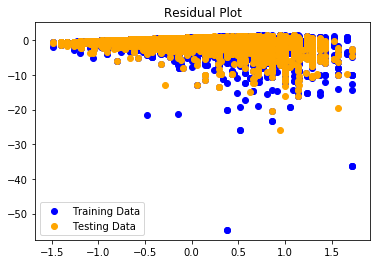

In [26]:
# Generate the model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
### END SOLUTION

### BEGIN SOLUTION
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [27]:
### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7475828301730589, R2: 0.24234533408128955
